<a href="https://colab.research.google.com/github/parthpendal/Concepts---Data-Analysis-and-Machine-Learning/blob/main/Power_Analysis%20(Sample%20Size%20Determine).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###                             Power analysis:
It is built from 4 variables, namely, Effect Size, Significance level, Power, Sample Size. All these variables are interrelated in the sense that changing one of them impacts the other three. Following this relationship, power analysis involves determining the fourth variable when the other three variables are known. It is a powerful tool for experimental design. For example, prior to an experiment, the sample size needed to detect a particular effect can be estimated given different desired levels of significance, effect size, and power. Alternatively, a study’s findings can be validated. Statistical power can be determined, by using the given sample size, effect size, and significance level, consequently helping to conclude whether the probability of committing a Type II error is acceptable from a decision-making perspective. 

##                    Power analysis using Python
The stats.power module of the statsmodels package in Python contains the required functions for carrying out power analysis for the most commonly used statistical tests such as t-test, normal based test, F-tests, and Chi-square goodness of fit test. It’s solve_power function takes 3 of the 4 variables mentioned above as input parameters and calculates the remaining 4th variable.

Consider a Student’s t-test, which is a statistical hypothesis test for comparing the means from two samples of Gaussian variables. In a pilot study with the two groups of variables, N1 = 4, Mean1 = 90, SD1 = 5; N2  = 4, Mean2 = 85, SD2 = 5. The assumption, or null hypothesis, of the test, is that the sample populations have the same mean. Since alpha is usually set to 0.05 and power to 0.80, the researcher primarily needs to be concerned with the sample size and the effect size. Let’s determine the sample size needed for the test in which a power of 80% is acceptable, with the significance level at 5% and the expected effect size to be found using the pilot study. 

In [1]:
# import required modules
from math import sqrt
from statsmodels.stats.power import TTestIndPower

#calculation of effect size
# size of samples in pilot study
n1, n2 = 4, 4

# variance of samples in pilot study
s1, s2 = 5**2, 5**2

# calculate the pooled standard deviation
# (Cohen's d)
s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))

# means of the samples
u1, u2 = 90, 85

# calculate the effect size
d = (u1 - u2) / s
print(f'Effect size: {d}')

# factors for power analysis
alpha = 0.05
power = 0.8

# perform power analysis to find sample size
# for given effect
obj = TTestIndPower()
n = obj.solve_power(effect_size=d, alpha=alpha, power=power,
					ratio=1, alternative='two-sided')

print('Sample size/Number needed in each group: {:.3f}'.format(n))


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Effect size: 1.0
Sample size/Number needed in each group: 16.715


# Alternatively, we can test the power of a specific proposed sample size. 

In [2]:

from statsmodels.stats.power import TTestPower
  
  
power = TTestPower()
n_test = power.solve_power(nobs=40, effect_size = 0.5,
                           power = None, alpha = 0.05)
print('Power: {:.3f}'.format(n_test))

Power: 0.869


## Plot power curves
We can also plot power curves. Power curves are line plots that show how the change in effect size and sample size impact the power of the statistical test. The plot_power() function can be used to create power curves. ‘dep_var‘ argument specifies the dependent variable (x-axis) and can be ‘nobs’, ‘effect_size’ or ‘alpha’. Here, ‘nobs’ is the sample size and takes in array values. Due to this, one curve is created for each value of effect size.

Let’s assume a significance level of 0.05 and explore the change in sample size between 5 and 100 with Cohen’s d standard low, medium, and high effect sizes.

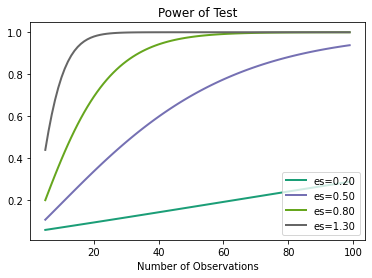

In [5]:
# import required libraries
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.power import TTestIndPower


# power analysis varying parameters
effect_sizes = np.array([0.2, 0.5, 0.8,1.3])
sample_sizes = np.array(range(5, 100))

# plot power curves
obj = TTestIndPower()
obj.plot_power(dep_var='nobs', nobs=sample_sizes,effect_size=effect_sizes)

plt.show()


## Sample size required for Ztest

In [ ]:
import statsmodels.stats.power as power
zpower = power.NormalIndPower()
chipower = power.GofChisquarePower()
zpower.solve_power(0.1, nobs1=None, alpha=0.05, power=0.9, ratio=1.) # Returns ~2100
chipower.solve_power(0.1, nobs=None, alpha=0.05, power=0.9) # Returns ~1050